In [91]:
import numpy as np 
import pandas as pd

In [92]:
df = pd.read_csv('..\DataSets\iris.csv')

In [93]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
df = df.iloc[:,1:]

In [95]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
encoder = LabelEncoder()

In [98]:
df['Species'] = encoder.fit_transform(df['Species'])

In [99]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [100]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [101]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

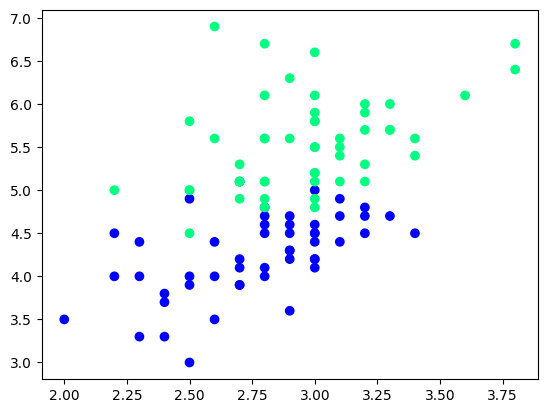

In [103]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [104]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
76,2.8,4.8,1
58,2.9,4.6,1
85,3.4,4.5,1
96,2.9,4.2,1
88,3.0,4.1,1
83,2.7,5.1,1
66,3.0,4.5,1
54,2.8,4.6,1
87,2.3,4.4,1
64,2.9,3.6,1


In [105]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [106]:
df_train

,SepalWidthCm,PetalLengthCm,Species
130,2.8,6.1,2
135,3.0,6.1,2
85,3.4,4.5,1
105,3.0,6.6,2
70,3.2,4.8,1
91,3.0,4.6,1
143,3.2,5.9,2
145,3.0,5.2,2
103,2.9,5.6,2
80,2.4,3.8,1


In [107]:
df_val

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
110,3.2,5.1,2
86,3.1,4.7,1
140,3.1,5.6,2
99,2.8,4.1,1


In [108]:
df_test

,SepalWidthCm,PetalLengthCm,Species
147,3.0,5.2,2
106,2.5,4.5,2
54,2.8,4.6,1
61,3.0,4.2,1
127,3.0,4.9,2


In [109]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [110]:
y_test

array([2, 2, 1, 2, 1])

### Case 1 - Bagging

In [111]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
91,3.0,4.6,1
135,3.0,6.1,2
130,2.8,6.1,2
105,3.0,6.6,2
130,2.8,6.1,2
135,3.0,6.1,2
80,2.4,3.8,1
135,3.0,6.1,2


In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [113]:
dt_bag1 = DecisionTreeClassifier()

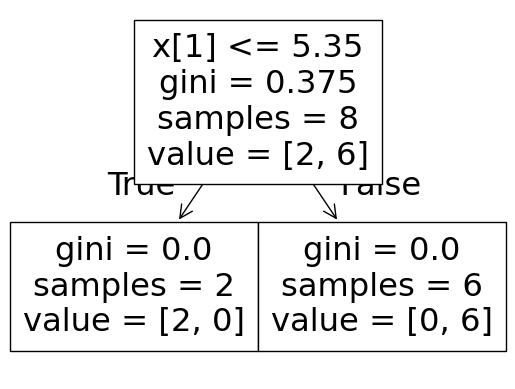

0.8


c:\Users\HP\ML-Practical-Concepts\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\ML-Practical-Concepts\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


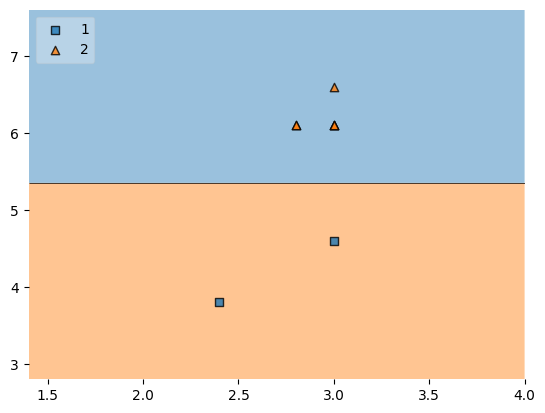

In [114]:
# Fit and evaluate dt_bag1 directly (evaluate() is defined later in the notebook)
dt_bag1.fit(X, y)
plot_tree(dt_bag1)
plt.show()
plot_decision_regions(X.values, y.values, clf=dt_bag1, legend=2)
y_pred = dt_bag1.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [115]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
130,2.8,6.1,2
85,3.4,4.5,1
91,3.0,4.6,1
130,2.8,6.1,2
145,3.0,5.2,2
145,3.0,5.2,2
145,3.0,5.2,2


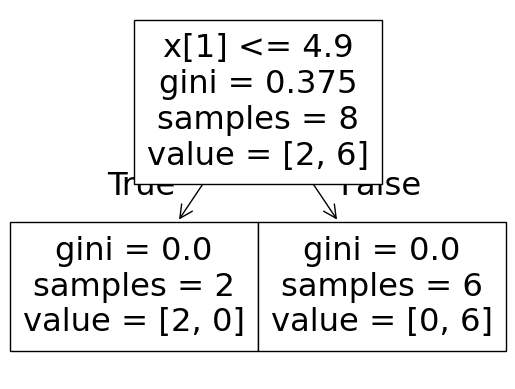

1.0


c:\Users\HP\ML-Practical-Concepts\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\ML-Practical-Concepts\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


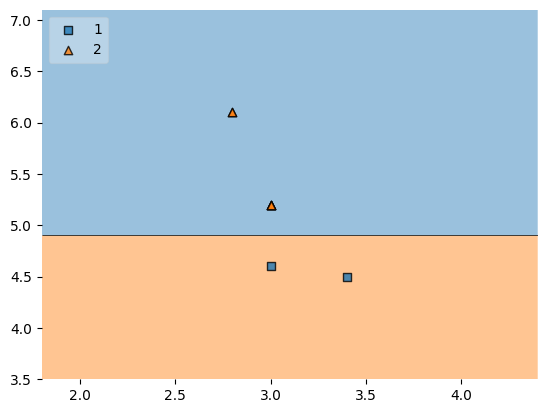

In [116]:
dt_bag2 = DecisionTreeClassifier()
try:
	evaluate(dt_bag2, X, y)
except NameError:
	# define evaluate locally if it's not yet defined/executed in another cell
	def evaluate(clf, X, y):
		clf.fit(X, y)
		plot_tree(clf)
		plt.show()
		plot_decision_regions(X.values, y.values, clf=clf, legend=2)
		y_pred = clf.predict(X_test)
		print(accuracy_score(y_test, y_pred))
	evaluate(dt_bag2, X, y)

In [117]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
145,3.0,5.2,2
130,2.8,6.1,2
105,3.0,6.6,2
145,3.0,5.2,2
80,2.4,3.8,1
85,3.4,4.5,1
70,3.2,4.8,1


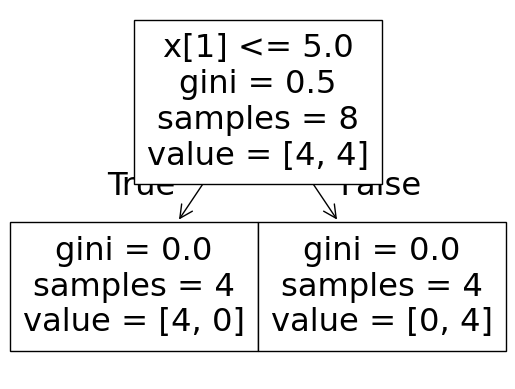

1.0


c:\Users\HP\ML-Practical-Concepts\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\ML-Practical-Concepts\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


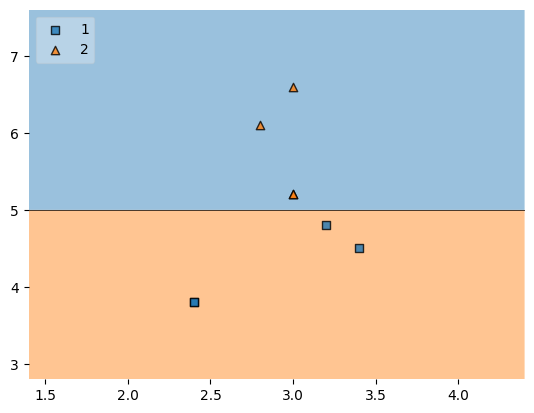

In [118]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [119]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

### Predict

In [120]:

df_test

,SepalWidthCm,PetalLengthCm,Species
147,3.0,5.2,2
106,2.5,4.5,2
54,2.8,4.6,1
61,3.0,4.2,1
127,3.0,4.9,2


In [121]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [1]


c:\Users\HP\ML-Practical-Concepts\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\ML-Practical-Concepts\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\ML-Practical-Concepts\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Pasting

In [122]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
130,2.8,6.1,2
135,3.0,6.1,2
85,3.4,4.5,1
105,3.0,6.6,2
70,3.2,4.8,1
91,3.0,4.6,1
143,3.2,5.9,2
145,3.0,5.2,2
103,2.9,5.6,2
80,2.4,3.8,1


In [123]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
103,2.9,5.6,2
135,3.0,6.1,2
143,3.2,5.9,2
85,3.4,4.5,1
105,3.0,6.6,2
80,2.4,3.8,1
70,3.2,4.8,1


### Random Subspaces

In [124]:
df1 = pd.read_csv('..\DataSets\iris.csv')
df1 = df1.sample(10)

In [125]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
141,142,6.9,3.1,5.1,2.3,Iris-virginica
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
127,128,6.1,3.0,4.9,1.8,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
26,27,5.0,3.4,1.6,0.4,Iris-setosa
131,132,7.9,3.8,6.4,2.0,Iris-virginica
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
68,69,6.2,2.2,4.5,1.5,Iris-versicolor


In [126]:
df1.sample(2,replace=True,axis=1)

,SepalLengthCm,Id
141,6.9,142
63,6.1,64
99,5.7,100
127,6.1,128
120,6.9,121
53,5.5,54
26,5.0,27
131,7.9,132
89,5.5,90
68,6.2,69


### Random Patches

In [127]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
141,142,6.9,3.1,5.1,2.3,Iris-virginica
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
127,128,6.1,3.0,4.9,1.8,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
26,27,5.0,3.4,1.6,0.4,Iris-setosa
131,132,7.9,3.8,6.4,2.0,Iris-virginica
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
68,69,6.2,2.2,4.5,1.5,Iris-versicolor


In [129]:
# Sample 8 rows with replacement, then sample 2 columns with replacement (random patches)
df1.sample(8, replace=True).sample(2, replace=True, axis=1)

,Id,PetalWidthCm
63,64,1.4
63,64,1.4
89,90,1.3
53,54,1.3
53,54,1.3
26,27,0.4
141,142,2.3
89,90,1.3
